# 04 - Applied ML

In [1]:
from math import ceil

import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
from operator import itemgetter
from scipy.stats import kstest

from scipy.stats import pareto
from scipy.stats import powerlaw
from scipy.stats import rayleigh

from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We load the dataframe, rename the race, married and nodegree variables to printable names and categorize them.

In [3]:
df = pd.read_csv('lalonde.csv', index_col=[0])

df['race'] = 'white'
df.loc[df['black'] == 1, 'race'] = 'black'
df.loc[df['hispan'] == 1, 'race'] = 'hispanic'
df.drop('black', 1, inplace=True)
df.drop('hispan', 1, inplace=True)
df['race'] = df['race'].astype('category')

df['married'] = df['married'].replace({0: 'Not married', 1: 'Married'}).astype('category')
df['nodegree'] = df['nodegree'].replace({0: 'Degree', 1: 'No degree'}).astype('category')

# Question 1

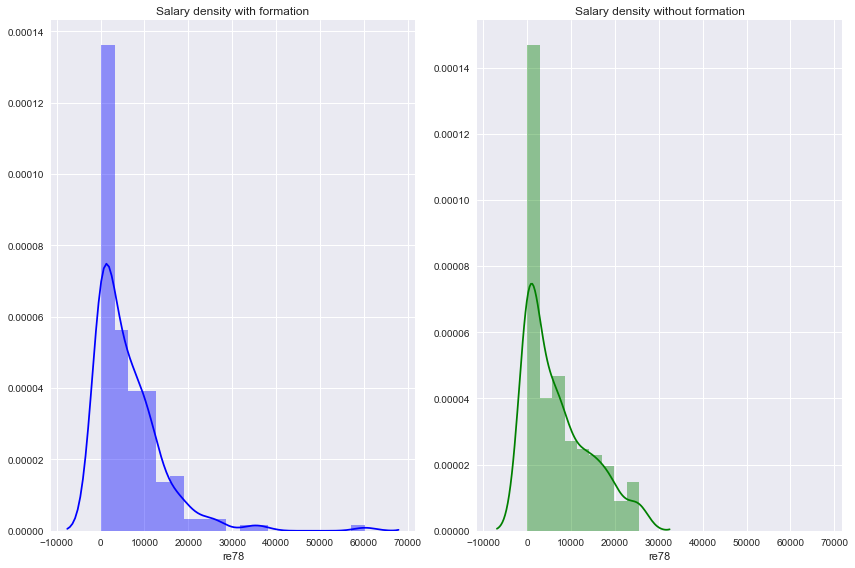

In [4]:
treated_res = df[df['treat'] == 1]['re78']
not_treated_res = df[df['treat'] == 0]['re78']

f, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
ax = axes[0]
ax.set_title("Salary density with formation")
sns.distplot(treated_res, color="b",  ax=ax);
ax = axes[1]
ax.set_title("Salary density without formation")
sns.distplot(not_treated_res, color="g", ax=ax);
plt.tight_layout()

Note about Kolmogorov-Smirnov test: even if very small difference, test will be zero, since test for exact match.
cf. https://stats.stackexchange.com/questions/74434/kolmogorov-smirnov-test-strange-output

I've tried with a lot of different distribution, and none gave me good results.

In [5]:
for n in range(1,5):
    for n2 in range(1, 5):
        print(stats.kstest(treated_res, 'f', [n,n2]))

KstestResult(statistic=0.72247061154971226, pvalue=0.0)
KstestResult(statistic=0.75332374053660534, pvalue=0.0)
KstestResult(statistic=0.75631520981296152, pvalue=0.0)
KstestResult(statistic=0.75668692399293636, pvalue=0.0)
KstestResult(statistic=0.71926741635058788, pvalue=0.0)
KstestResult(statistic=0.75331784777126587, pvalue=0.0)
KstestResult(statistic=0.75638722756771593, pvalue=0.0)
KstestResult(statistic=0.75670977605701406, pvalue=0.0)
KstestResult(statistic=0.71799512279017708, pvalue=0.0)
KstestResult(statistic=0.75331587751440088, pvalue=0.0)
KstestResult(statistic=0.75641475264985236, pvalue=0.0)
KstestResult(statistic=0.75671748675525574, pvalue=0.0)
KstestResult(statistic=0.71731828131037112, pvalue=0.0)
KstestResult(statistic=0.75331489125628437, pvalue=0.0)
KstestResult(statistic=0.7564293783315359, pvalue=0.0)
KstestResult(statistic=0.75672135980945399, pvalue=0.0)


QQplots for trying to match the distribution

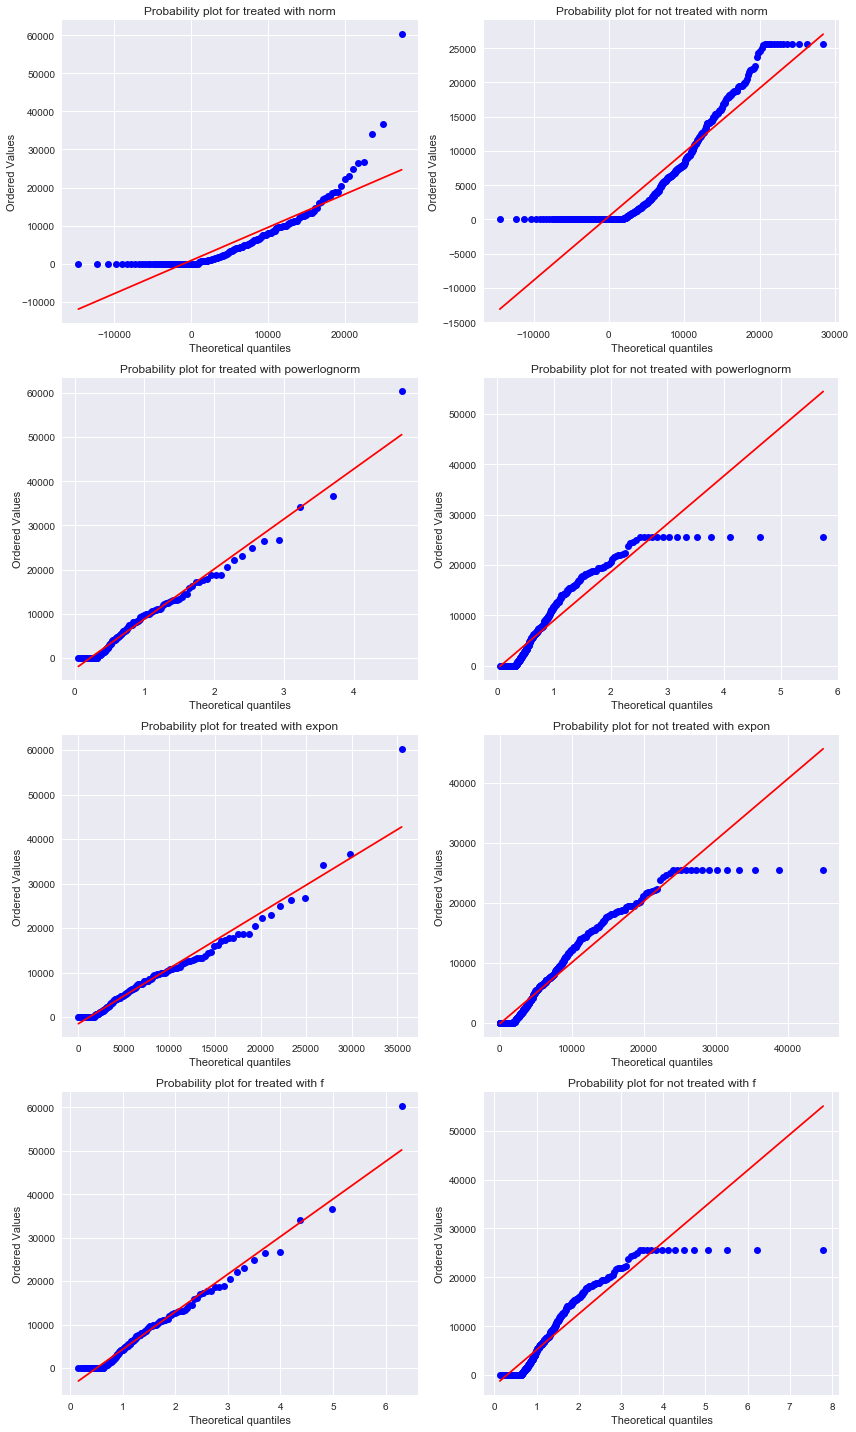

In [6]:
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
dist_names = ['norm', 'powerlognorm', 'expon', 'f']
params_treated = [stats.norm.fit(treated_res), [2, 1], stats.expon.fit(treated_res), [10,10]]
params_not_treated = [stats.norm.fit(not_treated_res), [2, 1], stats.expon.fit(not_treated_res), [10,10]]
# results = []

# for dist in dist_names:
#     res = kstest(not_treated_res, dist, getattr(stats, dist).fit(not_treated_res))
#     results.append((dist, res[1]))
# max(results, key=itemgetter(1))
f, axes = plt.subplots(len(dist_names), 2, figsize=(12, len(dist_names)*5))

for idx, dist in enumerate(dist_names):
    ax = axes[idx, 0]
    stats.probplot(treated_res, dist=dist, sparams=params_treated[idx], plot=ax)
    ax.set_title("Probability plot for treated with " + dist)
    ax = axes[idx, 1]
    stats.probplot(not_treated_res, dist=dist, sparams=params_not_treated[idx], plot=ax)
#   stats.probplot(treated_res, dist=dist, sparams=getattr(stats, dist).fit(treated_res), plot=ax)
    ax.set_title("Probability plot for not treated with " + dist)
plt.tight_layout()

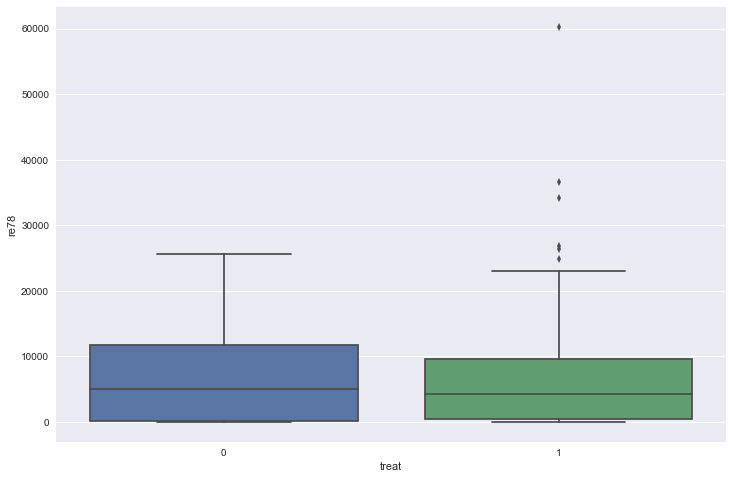

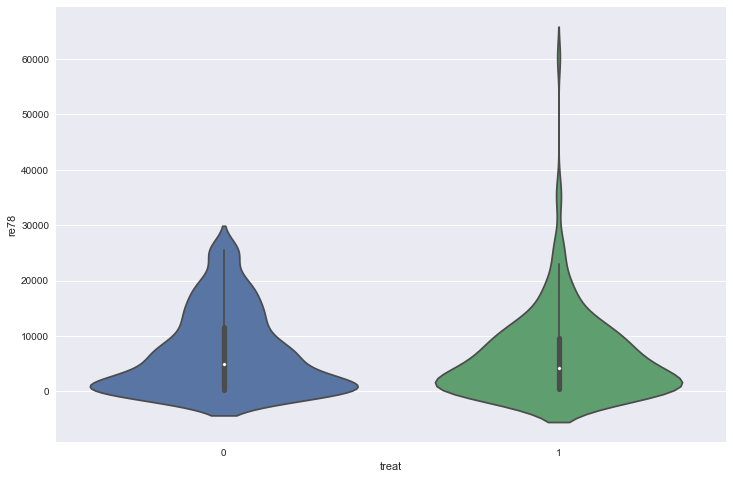

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y='re78',x='treat', data=df, ax=ax);
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(y='re78',x='treat', data=df, ax=ax);

In [8]:
print("Treated salary stats:\n" + treated_res.describe().to_string())
print("\nNot treated salary stats:\n" + not_treated_res.describe().to_string())

Treated salary stats:
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000

Not treated salary stats:
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000


Mean similar, quantile a bit lower, max much lower

# 2

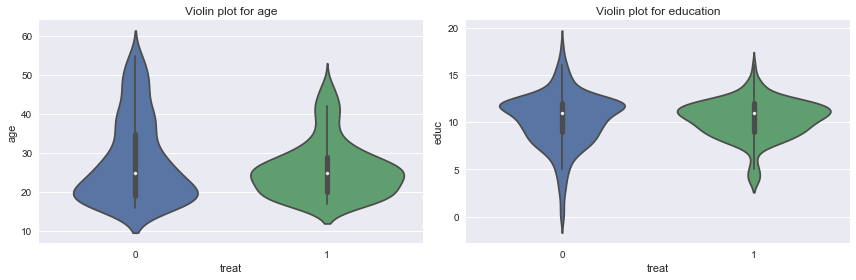

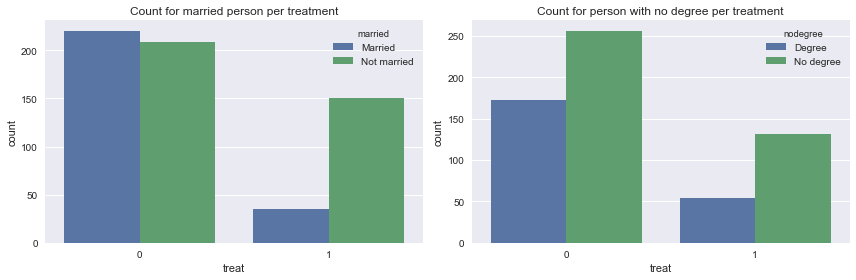

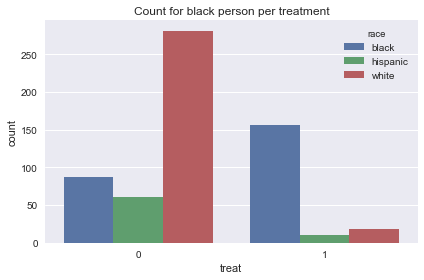

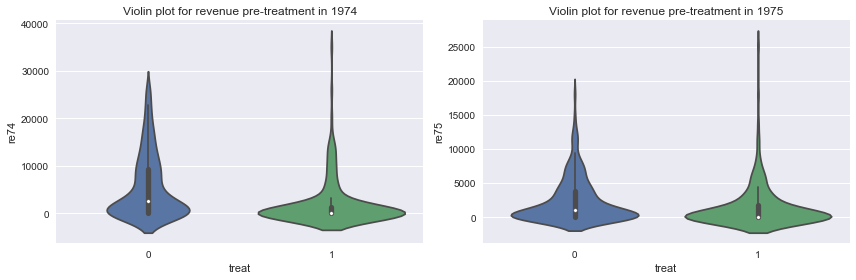

In [9]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].set_title("Violin plot for age")
sns.violinplot(x='treat', y='age', data=df, ax=axes[0])
axes[1].set_title("Violin plot for education")
sns.violinplot(x='treat', y='educ', data=df, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Count for married person per treatment")
sns.countplot(x='treat',hue='married', data=df, ax=axes[0])
axes[1].set_title("Count for person with no degree per treatment")
sns.countplot(x='treat',hue='nodegree', data=df, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.set_title("Count for black person per treatment")
sns.countplot(x='treat',hue='race', data=df, ax=axes)
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Violin plot for revenue pre-treatment in 1974")
sns.violinplot(x='treat', y='re74', data=df, ax=axes[0])
axes[1].set_title("Violin plot for revenue pre-treatment in 1975")
sns.violinplot(x='treat', y='re75', data=df, ax=axes[1])
plt.tight_layout();

# 3

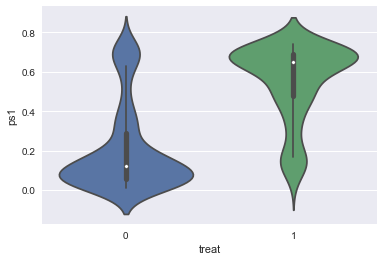

In [10]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
def compute_propensity(data):
    x = pd.get_dummies(data, columns=['race', 'married', 'nodegree']).drop(['treat', 're78'], 1)
    y = data['treat']
    logistic.fit(x,y)
    return logistic.predict_proba(x)[:,1]

propensity = compute_propensity(df)
df_copy = df.copy()
df_copy['ps1'] = propensity
sns.violinplot(x='treat', y='ps1', data=df_copy);

Definitly not well balanced...

# 4

Basic idea: 
Create a graph, where each person is a node, then add an edge between each person from treat and not-treat group which has for weight the absolute difference of propensity.

Then we simply need to apply a min weight matching alorithm on this graph to get the best pairs. Since networkx does not offer a max weight matching, we simply reversed the sign of the weight to get the min weight.


In [11]:
import networkx as nx

propensity = compute_propensity(df)

G = nx.Graph()
data_copy = df.copy()
propensity = pd.Series(propensity, index=data_copy.index)
treated = propensity[df['treat'] == 1]
not_treated = propensity[df['treat'] == 0]

for index_treated, ps_treated in treated.iteritems():
    for index_not_treated, ps_not_treated in not_treated.iteritems():
        propensity_diff = -np.abs(ps_treated - ps_not_treated)
        G.add_edge(index_treated, index_not_treated, weight=propensity_diff)

In [12]:
mate = nx.max_weight_matching(G, True)

In [13]:
matched = df.loc[mate.keys()]

In [14]:
propensity = compute_propensity(df)
data_copy = df.copy()
propensity = pd.Series(propensity, index=data_copy.index)

sum_ = 0
for k, v in mate2.items():
    sum_ += np.abs(propensity.loc[k]-propensity.loc[v])
sum_

NameError: name 'mate2' is not defined

Other implementation, works better, I do not know why...

We use for a caliper 0.2 * std(logit(propensity)) as suggested in https://www.ncbi.nlm.nih.gov/pubmed/20925139
for algorithm cf. http://onlinelibrary.wiley.com/doi/10.1002/sim.6004/epdf, we implemented greedy nearest neighbor (random) without replacement

In [ ]:
from scipy.special import logit
from sklearn.utils import shuffle

def match(data, propensity, seed=1):
    np.random.seed(seed)
    
    caliper = 0.2 * logit(propensity).std()
    data_internal = data.copy()
    data_internal['propensity'] = propensity
    treated = data_internal[data_internal['treat'] == 1]
    not_treated = data_internal[data_internal['treat'] == 0]
    
    matched = treated.copy()
    for idx, propensity in treated['propensity'].iteritems():
        distance = (propensity - not_treated['propensity']).abs()
        print(idx, distance)
        min_index = distance.argmin()
        min_dist = distance.loc[min_index]
        if min_dist < caliper:
            matched.loc[len(matched)] = not_treated.loc[min_index]
            not_treated.drop(min_index)
        else:
            print("No Match")
    return matched

In [ ]:
propensity = compute_propensity(df)
matched = match(df, propensity)
propensity = compute_propensity(matched)
matched['ps1'] = propensity
sns.violinplot(x='treat', y='ps1', data=matched);

Much better, median closer, shape closer

In [ ]:
treated_res = matched[matched['treat'] == 1]['re78']
not_treated_res = matched[matched['treat'] == 0]['re78']

f, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
ax = axes[0]
ax.set_title("Salary density with formation")
sns.distplot(treated_res, color="b",  ax=ax);
ax = axes[1]
ax.set_title("Salary density without formation")
sns.distplot(not_treated_res, color="g", ax=ax);
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].set_title("Violin plot for age")
sns.violinplot(x='treat', y='age', data=matched, ax=axes[0])
axes[1].set_title("Violin plot for education")
sns.violinplot(x='treat', y='educ', data=matched, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Count for married person per treatment")
sns.countplot(x='treat',hue='married', data=matched, ax=axes[0])
axes[1].set_title("Count for person with no degree per treatment")
sns.countplot(x='treat',hue='nodegree', data=matched, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.set_title("Count for black person per treatment")
sns.countplot(x='treat',hue='race', data=matched, ax=axes)
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Violin plot for revenue pre-treatment in 1974")
sns.violinplot(x='treat', y='re74', data=matched, ax=axes[0])
axes[1].set_title("Violin plot for revenue pre-treatment in 1975")
sns.violinplot(x='treat', y='re75', data=matched, ax=axes[1])
plt.tight_layout();

# Question 2

First of all we fetch the dataset.

In [2]:
newsgroups = fetch_20newsgroups(subset='all')

Then we partition the dataset in train, validation and test subsets. For the train set set we take the first 10% of the dataset, for the validation set we take the second 10% and for the test test set all that's left. This approach assumes that the dataset stores data in no particular order. If the data were ordered then splitting the data this way wouldn't be accettable since we'd train the model on a specific category and then test it on another which would lead to poor performance. We printed and analyzed the data contained in newsgroups.data  and could remark that there's no relation of order between an element and the following one in the dataset.

In [3]:
data_size = newsgroups.target.shape[0]
train_size = ceil(data_size/10)
validation_size = train_size
test_size = data_size - train_size - validation_size

x_train = newsgroups.data[:train_size]
y_train = newsgroups.target[:train_size]

x_validation = newsgroups.data[train_size:2*train_size]
y_validation = newsgroups.target[train_size:2*train_size]

x_test = newsgroups.data[2*train_size:]
y_test = newsgroups.target[2*train_size:]

Here we vectorize the text data in order to obtain integer vectors which can be used for computation.

In [4]:
vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(x_train)
vectors_test = vectorizer.transform(x_test)
vectors_validation = vectorizer.transform(x_validation)

Now we need to train a random forest. First we use the validation test to do a grid search on the "max_depth" and "n_estimators" parameters to determine which values give the best results. 

An exhaustive grid search would take a very long time, therefore we don't iterate on continuos subsets but we sample  values in the range [1,41] with step 5 for "max_depth" and in the range [1,1001] with step 100 for "n_estimators".
We chose large ranges in order to try capturing the behaviour of the parameters.

After the completion of the grid search we initialize a random forest with the parameters which produced best results in the grid search, and then train and test the random forest by using the corresponding sets.

Finally, we plot the confusion matrix associated to the random forest's predictions.

Please note that in order to compute the accuracy of the predictions and the confusion matrix we use methods of sklearn's metrics module. The manual implementation of these two methods would have been pretty straightforward therefore we think this choice doesn't impact negatively the learning process of the Machine Learning pipeline.

To plot the confusion matrix we use the seaborn library which we believe to have the right to use.

In [5]:
depths = range(1,41, 5)
n_estimators= range(1, 1002, 100)

best_prediction_score = 0
best_depth = -1
best_n_estimators = -1

for depth in depths:
    for n_estimator in n_estimators:
        clf = RandomForestClassifier(max_depth= depth, n_estimators= n_estimator)
        clf.fit(vectors_train, y_train)
        predictions_validation = clf.predict(vectors_validation)
        prediction_score = metrics.accuracy_score(y_validation, predictions_validation)
        if prediction_score > best_prediction_score:
            best_prediction_score = prediction_score
            best_depth = depth
            best_n_estimators = n_estimator
            
print(best_depth, best_n_estimators, best_prediction_score)

36 801 0.725729442971


In [6]:
clf = RandomForestClassifier(max_depth=best_depth, n_estimators=best_n_estimators)
clf.fit(vectors_train, y_train)
predictions = clf.predict(vectors_test)

print(metrics.accuracy_score(y_test, predictions))

0.736999204033


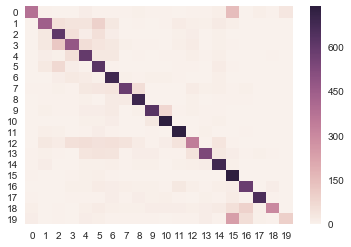

In [7]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(confusion_matrix)

This confusion matrix shows how the the model produces mostly correct predictions, since we have highe values on the diagonal and low values elsewhere.
It can be noted that the distribution pattern of incorrect predictions in the confusion matrix hints at the presence of category clusters. For instance, it can be noted that the model has some difficulty distinguishing between categories 1 to 5. It can also be seen that categories 18 and 19 are often wrongly classified as 15 or 16. 
All this leads to believe that some categories share a strong relation. 

Let's print the names and indexes for each category and analyze the result.

In [8]:
a = []
for i, name in enumerate(newsgroups.target_names):
    a.append((i, name))
a

[(0, 'alt.atheism'),
 (1, 'comp.graphics'),
 (2, 'comp.os.ms-windows.misc'),
 (3, 'comp.sys.ibm.pc.hardware'),
 (4, 'comp.sys.mac.hardware'),
 (5, 'comp.windows.x'),
 (6, 'misc.forsale'),
 (7, 'rec.autos'),
 (8, 'rec.motorcycles'),
 (9, 'rec.sport.baseball'),
 (10, 'rec.sport.hockey'),
 (11, 'sci.crypt'),
 (12, 'sci.electronics'),
 (13, 'sci.med'),
 (14, 'sci.space'),
 (15, 'soc.religion.christian'),
 (16, 'talk.politics.guns'),
 (17, 'talk.politics.mideast'),
 (18, 'talk.politics.misc'),
 (19, 'talk.religion.misc')]

The result confirms the aforementioned hypothesis: we verify that categories 1-5 are part of the macro-category "computers" and find an explanation for the behaviour of the model, which has some difficulty in distinguishing between the categories part of the same macro-category. 
The same reasonment can be applied to other clusters like the one composed of categories 15-19 which are related to political/religious talk. An interesting cluster is the one composed of categories 0 and 19, which discuss creed.


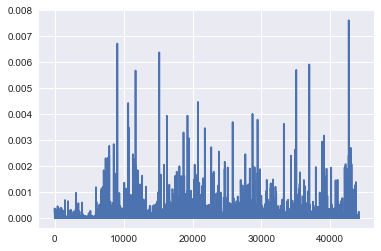

In [9]:
x = range(clf.n_features_)
y = clf.feature_importances_

plt.plot(x,y)
plt.show()

It can be noticed that the difference in importance among features is considerable and that the contribution of ten features eclipses that of the others. We'll proceed to print the names of these features to gain some insight on their nature.

In [10]:
def top10_features(classifier, vectorizer):
    feature_names = np.asarray(vectorizer.get_feature_names())
    top10 = np.argsort(classifier.feature_importances_)[-10:]
    print("%s" % (" ".join(feature_names[top10])))

top10_features(clf, vectorizer)

god nhl car hockey clipper sale space dod bike windows


The most important features are indeed terms that allow the model to efficiently disambiguate among categories. 
For instance if the term "car" appears in a text, then most likely it'll be part of category 7. "sale" is associated to category 6, "mac" to category 4 and so on. 